# Assignment

# Problem statement 1 

We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.
Data

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [9]:
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([ 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

Text(0, 0.5, 'Min and max temperature')

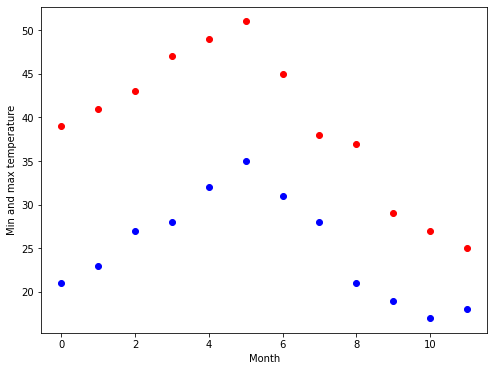

In [14]:
months = np.arange(12)
plt.figure(figsize=(8,6))
plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

Fitting it to a periodic function

In [59]:
from scipy.optimize import curve_fit

In [63]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

Plotting the fit

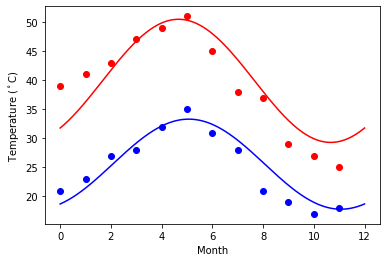

In [64]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

# Problem statement 2

This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

1.Create a pie chart presenting the male/female proportion

2.Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [65]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [66]:
males = titanic[titanic['sex']=='male'].index.value_counts().count()
print("male count is {}".format(males))
females =titanic[titanic['sex']=='female'].index.value_counts().count()
print("female count is {}".format(females))

male count is 843
female count is 466


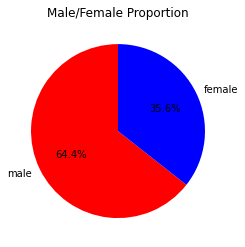

In [80]:
list_1 = [males,females]
gender = ['male','female']
plt.title('Male/Female Proportion')
colors = ['r','b']
plt.pie(list_1,labels=gender,colors=colors,startangle=90,autopct='%.1f%%')
plt.show()

d:\anaconda\envs\inueron\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


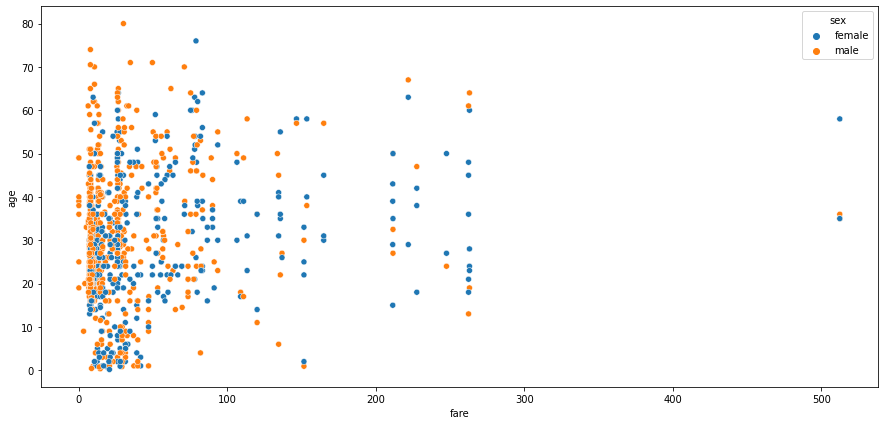

In [94]:
plt.figure(figsize=(15,7))
sns.scatterplot(titanic.fare,titanic.age,hue=titanic.sex)
plt.show()